# Digital Image Processing(ELL715) Group 13

In [297]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [298]:
I_c = cv2.imread('12_test.tif', cv2.IMREAD_COLOR)
I_c = cv2.cvtColor(I_c, cv2.COLOR_BGR2RGB)
I_c = I_c/255

Text(0.5, 1.0, 'Original Image')

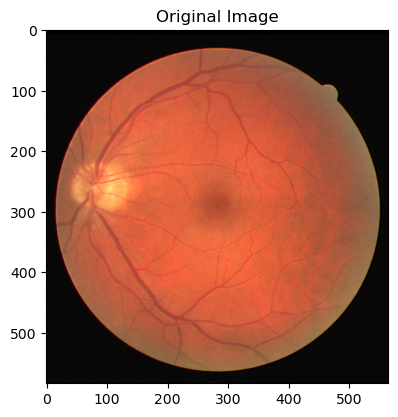

In [299]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(I_c)
plt.title('Original Image')

# Original Image 
We uploaded the test image "01_test.tif" from the folder of Dataset

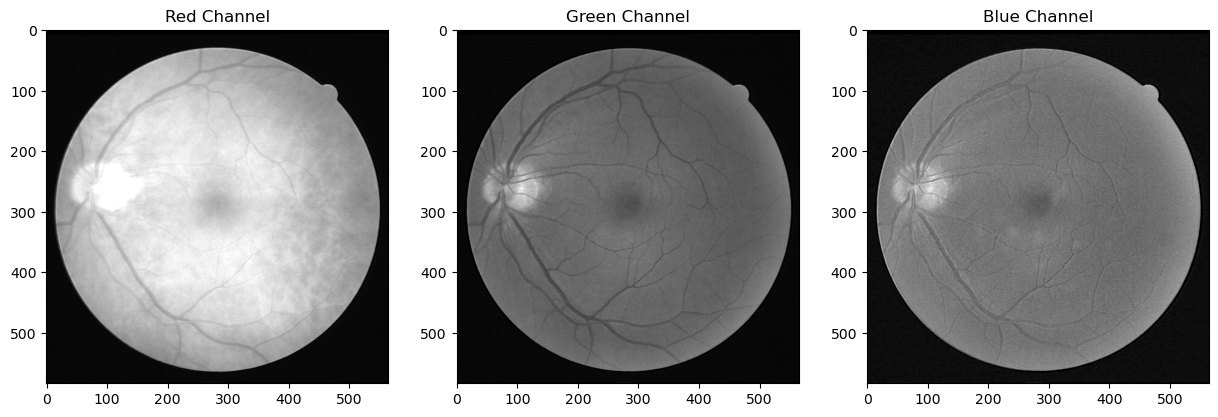

In [300]:
red = I_c[:,:,0]
I_c_base1 = red

green = I_c[:,:,1]
I_c_base2 = green

blue = I_c[:,:,2]
I_c_base3 = blue

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(red, cmap='gray')
plt.title('Red Channel')

plt.subplot(1, 3, 2)
plt.imshow(green, cmap='gray')
plt.title('Green Channel')

plt.subplot(1, 3, 3)
plt.imshow(blue, cmap='gray')
plt.title('Blue Channel')

plt.show()

# Decomposed into Red, Green and Blue Channel
We extracted the R, G and B channels from the image

In [301]:
def calculate_lambda1c(image):
    W, H = image.shape
#     print(W)
#     print(H)
    Ns = np.array([[1, -2, 1], [-2, 4, -2], [1, -2, 1]])
    lambda_1c = np.sqrt(np.pi/2) * (1 / (6 * (W - 2) * (H - 2))) * np.sum(np.abs(cv2.filter2D(image, -1, Ns)))
    return lambda_1c

lambda_1c = calculate_lambda1c(red)
lambda_2c = calculate_lambda1c(green)
lambda_3c = calculate_lambda1c(blue)

print("Lambda for red:", lambda_1c)
print("Lambda for green:", lambda_2c)
print("Lambda for blue:", lambda_3c)

Lambda for red: 0.004264164217663799
Lambda for green: 0.00413704006082273
Lambda for blue: 0.0043881183955299516


# Lamda values for all channels
For the First step we calulated the regulation parameter for all channels 

In [302]:
learning_rate = 0.1
num_iterations = 100
lambda_c = lambda_1c

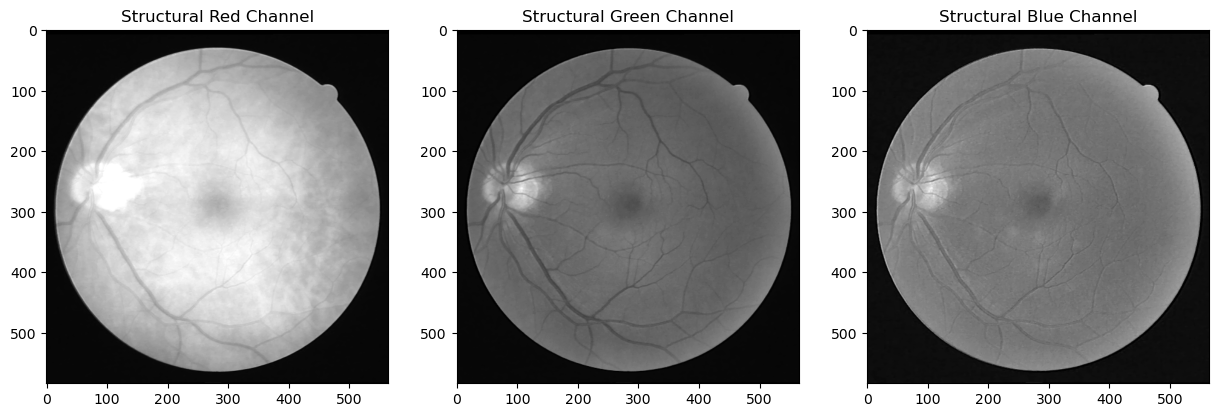

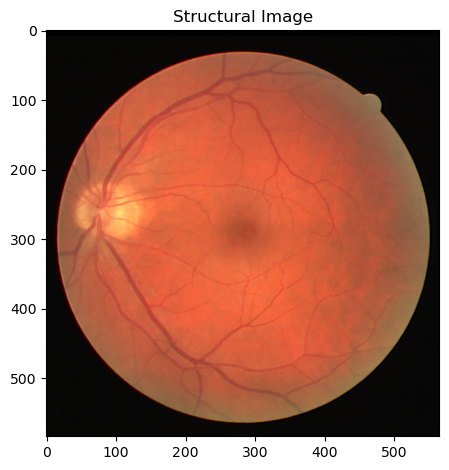

In [303]:
from skimage import io, restoration
import matplotlib.pyplot as plt

eps = 0.02
max_num_iter = 500

structure_red = restoration.denoise_tv_chambolle(red, weight=lambda_1c)

structure_green = restoration.denoise_tv_chambolle(green, weight=lambda_2c)

structure_blue = restoration.denoise_tv_chambolle(blue, weight=lambda_3c)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(structure_red, cmap='gray')
axes[0].set_title('Structural Red Channel')

axes[1].imshow(structure_green, cmap='gray')
axes[1].set_title('Structural Green Channel')

axes[2].imshow(structure_blue, cmap='gray')
axes[2].set_title('Structural Blue Channel')
plt.show()

structure_I_c = np.stack((structure_red, structure_green, structure_blue), axis=-1)

plt.imshow(structure_I_c)
plt.title('Structural Image')

plt.tight_layout()
plt.show()
# min I_base(x,y) ∑{(I_base(x, y) - I(x, y))² + λ ||∇I_base(x, y)||}

# Structural Layer
We First get the Structural Layer for all the channels by minimising the equation
The expression "min I_base(x, y) ∑{(I_base(x, y) - I(x, y))² + λ ||∇I_base(x, y)||}" represents the objective function for image denoising using the Total Variation (TV) regularization. 

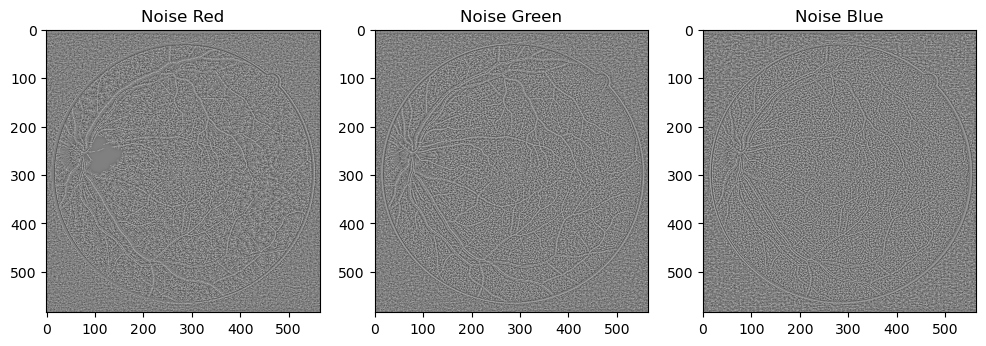

In [304]:
Inoise_red = structure_red - red
Inoise_green = structure_green - green
Inoise_blue = structure_blue - blue

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(Inoise_red, cmap='gray')
plt.title('Noise Red')

plt.subplot(1, 3, 2)
plt.imshow(Inoise_green, cmap='gray')
plt.title('Noise Green')

plt.subplot(1, 3, 3)
plt.imshow(Inoise_blue, cmap='gray')
plt.title('Noise Blue')

plt.show()

# Noise Layer for all Channels(R,G and B)
Using the Expression mentioned below
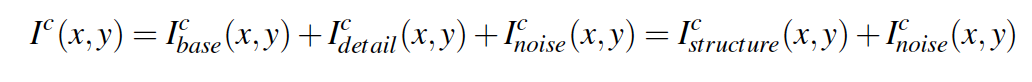

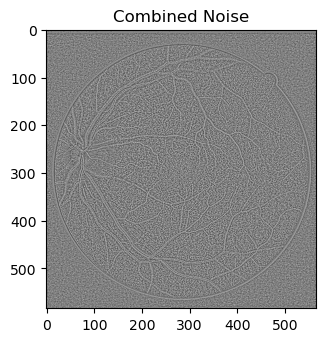

In [305]:
import matplotlib.pyplot as plt

scale_factor = 2.0

Inoise_combined = Inoise_red + Inoise_green + Inoise_blue
Inoise_combined_scaled = Inoise_combined * scale_factor

plt.figure(figsize=(16, 4)) 

plt.subplot(1, 4, 4)

plt.imshow(Inoise_combined_scaled, cmap='gray')
plt.title('Combined Noise')
plt.show()

# Combined Noise layer and below is scaled one
Ibase = Inoise

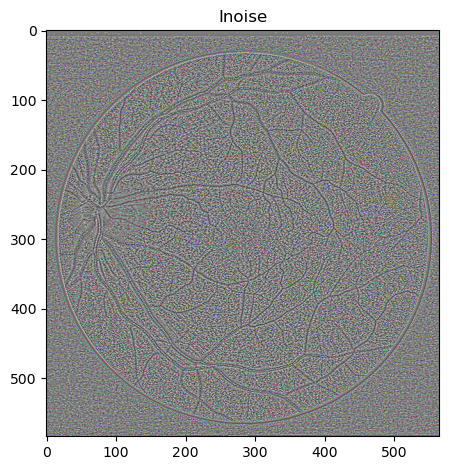

In [306]:
Inoise = I_c - structure_I_c

Inoise = (Inoise-np.min(Inoise))
Inoise = Inoise/np.max(Inoise)

plt.imshow(Inoise )
plt.title('Inoise')

plt.tight_layout()
plt.show()

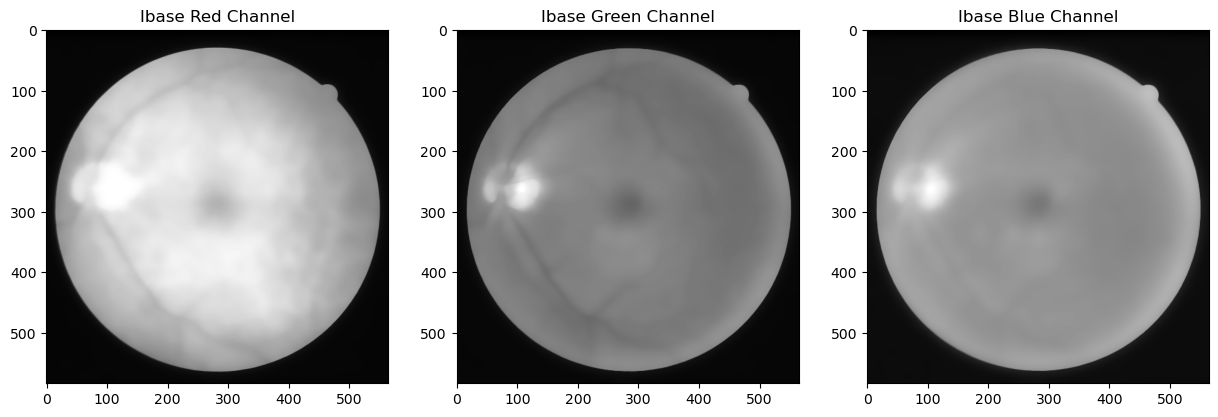

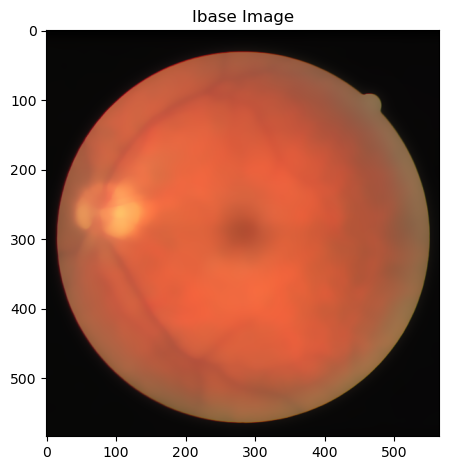

In [307]:
from skimage import io, restoration
import matplotlib.pyplot as plt

eps = 0.002
max_num_iter = 500

ibase_red = restoration.denoise_tv_chambolle(structure_red, weight=0.3)

ibase_green = restoration.denoise_tv_chambolle(structure_green, weight=0.3)

ibase_blue = restoration.denoise_tv_chambolle(structure_blue, weight=0.3)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(ibase_red, cmap='gray')
axes[0].set_title('Ibase Red Channel')

axes[1].imshow(ibase_green, cmap='gray')
axes[1].set_title('Ibase Green Channel')

axes[2].imshow(ibase_blue, cmap='gray')
axes[2].set_title('Ibase Blue Channel')
plt.show()

ibase_I_c = np.stack((ibase_red, ibase_green, ibase_blue), axis=-1)

plt.imshow(ibase_I_c)
plt.title('Ibase Image')

plt.tight_layout()
plt.show()
# min I_base(x,y) ∑{(I_base(x, y) - I(x, y))² + λ ||∇I_base(x, y)||}

# Ibase Layer for all channels and combined layer
Assuming I as Istructural we get above and usinf the minimising function we get Ibase layer for all channels 
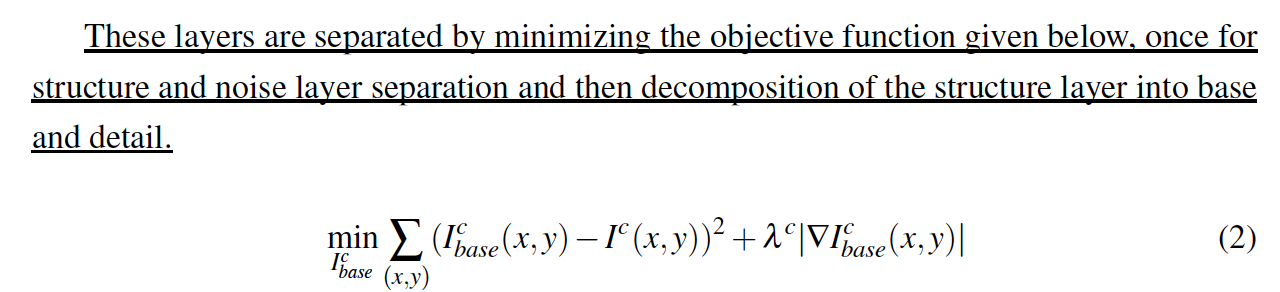

In [308]:
idetail_red = structure_red - ibase_red
idetail_blue = structure_blue - ibase_blue
idetail_green = structure_green - ibase_green

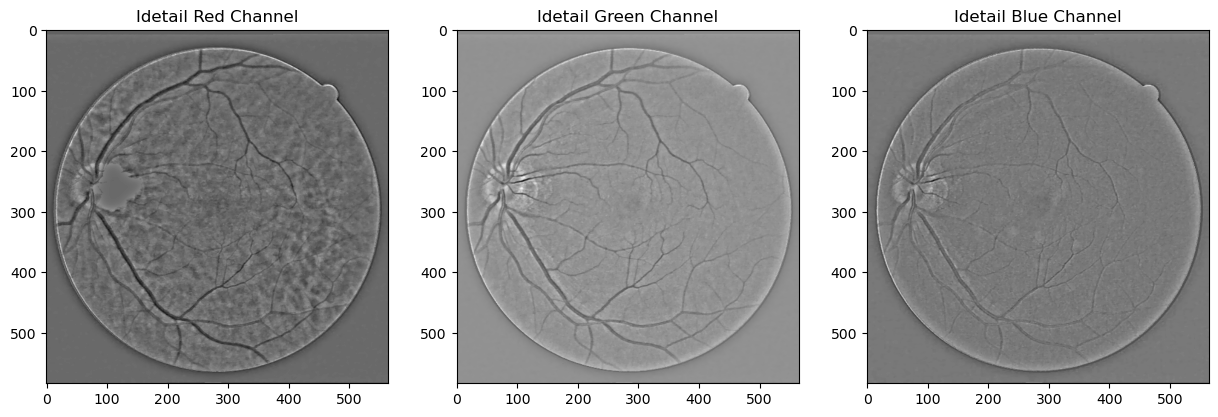

In [309]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(idetail_red, cmap='gray')
axes[0].set_title('Idetail Red Channel')

axes[1].imshow(idetail_green, cmap='gray')
axes[1].set_title('Idetail Green Channel')

axes[2].imshow(idetail_blue, cmap='gray')
axes[2].set_title('Idetail Blue Channel')
plt.show()

# Detail Layer for all Channels
Idetail layer for all channels, we can observe red channel and green channels contain most of the information

In [310]:
my_integer_list = []

In [311]:
import numpy as np
from scipy.signal import convolve2d
import matplotlib.pyplot as plt

In [312]:
Gaussian_red = cv2.GaussianBlur(idetail_red, (3, 3), sigmaX=10)

In [313]:
Gaussian_green = cv2.GaussianBlur(idetail_green, (3, 3), sigmaX=10)

In [314]:
Gaussian_blue = cv2.GaussianBlur(idetail_blue, (3, 3), sigmaX=10)

(3, 3): This is the size of the kernel or filter that is applied to the image. In this case, it's a 3x3 Gaussian kernel. The size of the kernel determines the extent of the blurring effect.

sigmaX=10: Sigma is a parameter that defines the standard deviation of the Gaussian kernel. A higher sigma value results in a broader Gaussian distribution, leading to a stronger blurring effect. In this case, sigmaX is set to 10.

# Gaussian Filter

In [315]:
w3_red = Gaussian_red

In [316]:
np.max(ibase_red), np.min(ibase_red)

(0.9999273890331761, 0.006478369517605692)

In [317]:
w3_green = Gaussian_green

In [318]:
w3_blue = 0*Gaussian_blue

# w3 values for R, G and B channels 

In [319]:
I_out_red = ibase_red + 6*w3_red
I_out_green = ibase_green + 6*w3_green
I_out_blue = 1*ibase_blue + w3_blue

# I_enhanced layer for all channels

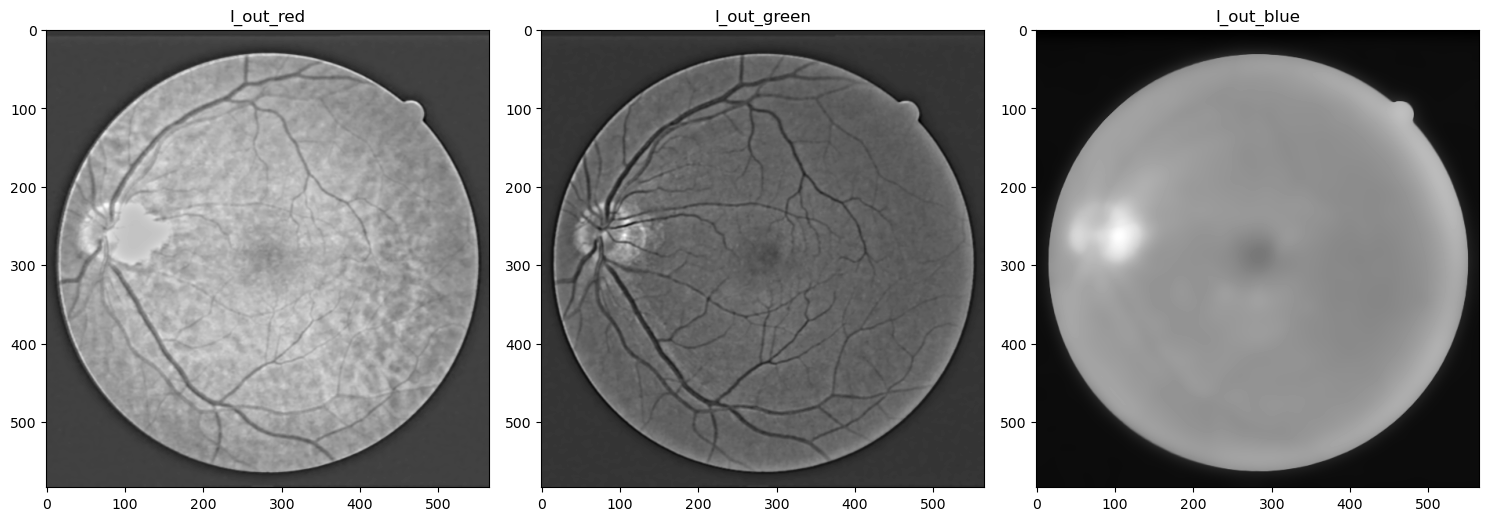

In [320]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(I_out_red, cmap='gray')
axes[0].set_title('I_out_red')
axes[1].imshow(I_out_green, cmap='gray')
axes[1].set_title('I_out_green')
axes[2].imshow(I_out_blue, cmap='gray')
axes[2].set_title('I_out_blue')
plt.tight_layout()
plt.show()

# Expression for Obtaining the enhanced layer for all Channles
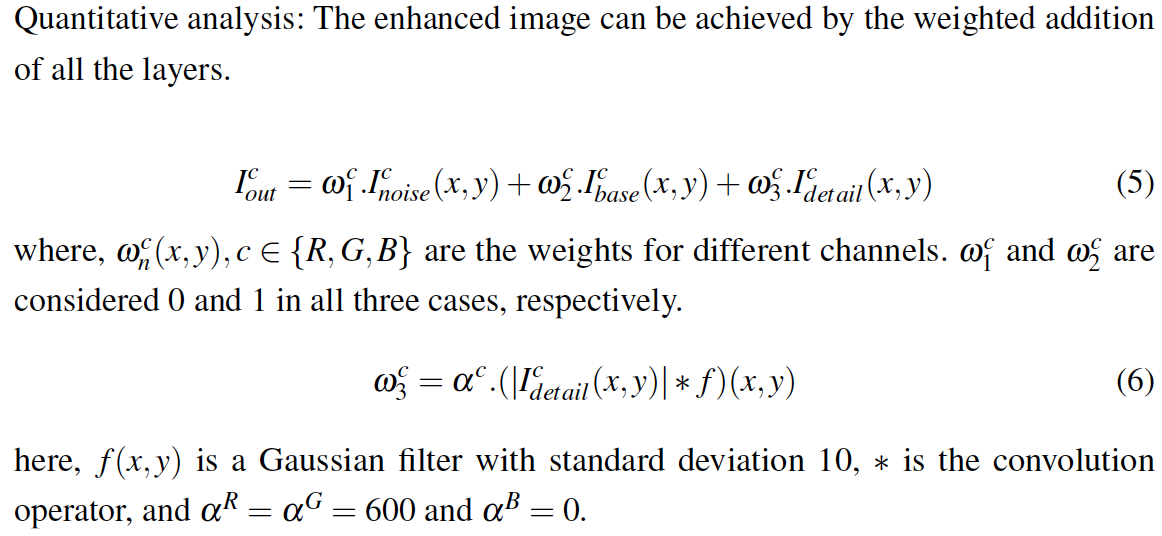

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'Original image')

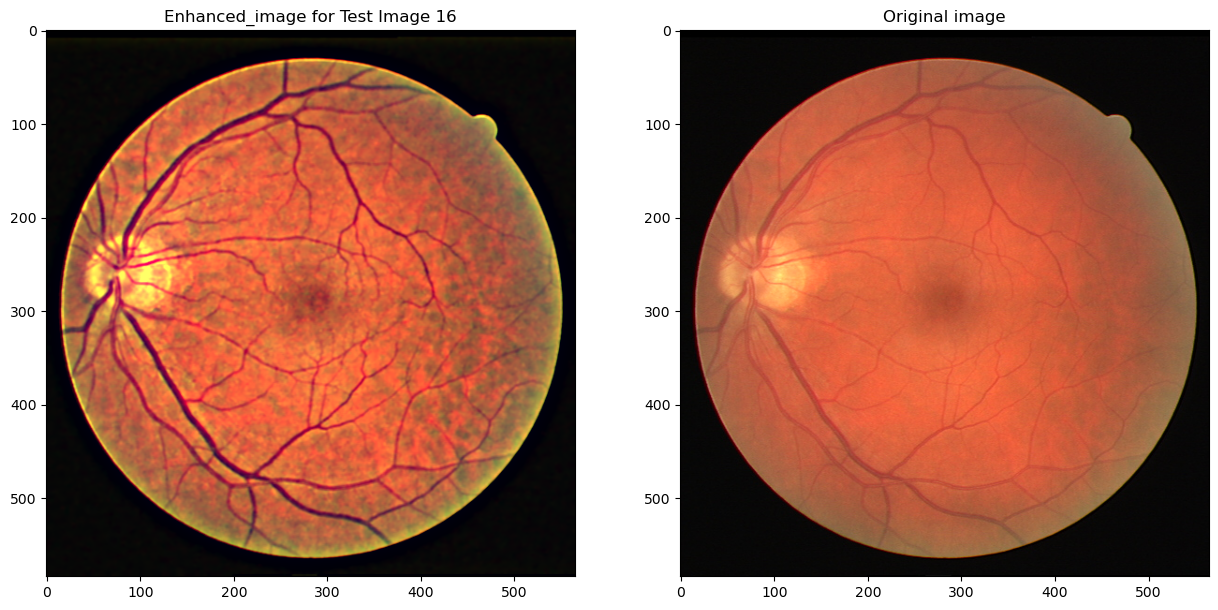

In [321]:
enhanced_image = cv2.merge((I_out_red, I_out_green, I_out_blue))  
plt.figure(figsize= (15,8))
plt.subplot(1,2,1)
plt.imshow(enhanced_image)
plt.title('Enhanced_image for Test Image 16')

plt.subplot(1,2,2)
plt.imshow(I_c)
plt.title('Original image')


# Final Enhanced Image vs Original Image
Enhanced Image contain most of the information and more clear than the original one

In [322]:
import numpy as np
import cv2

def calculate_c_local(image, window_size):
    if image.dtype == np.float64:
        image = (255 * (image - np.min(image)) / np.ptp(image)).astype(np.float32)
    if len(image.shape) > 2:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    pad_size = window_size // 2
    padded_image = cv2.copyMakeBorder(image, pad_size, pad_size, pad_size, pad_size, cv2.BORDER_REFLECT)
    c_local_values = []

    for i in range(pad_size, padded_image.shape[0] - pad_size):
        for j in range(pad_size, padded_image.shape[1] - pad_size):
            # Extract NxN window
            window = padded_image[i - pad_size:i + pad_size + 1, j - pad_size:j + pad_size + 1]

            # Calculate max and min
            local_max = np.max(window)
            local_min = np.min(window)

            # Check for divide by zero
            if local_max + local_min == 0:
                c_local = 0
            else:
                # Calculate C_local and append to the list
                c_local = (local_max - local_min) / (local_max + local_min)

            c_local_values.append(c_local)

    return np.array(c_local_values)

original_image = red
enhanced_imaged = I_out_red

c_local_original = calculate_c_local(original_image, 51)
c_local_enhanced = calculate_c_local(enhanced_imaged, 51)

average_difference = np.nanmean(- c_local_enhanced + c_local_original)

print("Average Difference in C_local for Red Channel:", average_difference)


Average Difference in C_local for Red Channel: 0.10890817


In [323]:
import numpy as np
import cv2

def calculate_c_local(image, window_size):
    if image.dtype == np.float64:
        image = (255 * (image - np.min(image)) / np.ptp(image)).astype(np.float32)
    if len(image.shape) > 2:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    pad_size = window_size // 2
    padded_image = cv2.copyMakeBorder(image, pad_size, pad_size, pad_size, pad_size, cv2.BORDER_REFLECT)
    c_local_values = []

    for i in range(pad_size, padded_image.shape[0] - pad_size):
        for j in range(pad_size, padded_image.shape[1] - pad_size):
            # Extract NxN window
            window = padded_image[i - pad_size:i + pad_size + 1, j - pad_size:j + pad_size + 1]

            # Calculate max and min
            local_max = np.max(window)
            local_min = np.min(window)

            # Check for divide by zero
            if local_max + local_min == 0:
                c_local = 0
            else:
                # Calculate C_local and append to the list
                c_local = (local_max - local_min) / (local_max + local_min)

            c_local_values.append(c_local)

    return np.array(c_local_values)

original_image = green
enhanced_imaged = I_out_green

c_local_original = calculate_c_local(original_image, 51)
c_local_enhanced = calculate_c_local(enhanced_imaged, 51)

average_difference = np.nanmean(- c_local_enhanced + c_local_original)

print("Average Difference in C_local for Green Channel:", average_difference)


Average Difference in C_local for Green Channel: 0.064749435


In [324]:
import numpy as np
import cv2

def calculate_c_local(image, window_size):
    if image.dtype == np.float64:
        image = (255 * (image - np.min(image)) / np.ptp(image)).astype(np.float32)
    if len(image.shape) > 2:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    pad_size = window_size // 2
    padded_image = cv2.copyMakeBorder(image, pad_size, pad_size, pad_size, pad_size, cv2.BORDER_REFLECT)
    c_local_values = []

    for i in range(pad_size, padded_image.shape[0] - pad_size):
        for j in range(pad_size, padded_image.shape[1] - pad_size):
            # Extract NxN window
            window = padded_image[i - pad_size:i + pad_size + 1, j - pad_size:j + pad_size + 1]

            # Calculate max and min
            local_max = np.max(window)
            local_min = np.min(window)

            # Check for divide by zero
            if local_max + local_min == 0:
                c_local = 0
            else:
                # Calculate C_local and append to the list
                c_local = (local_max - local_min) / (local_max + local_min)

            c_local_values.append(c_local)

    return np.array(c_local_values)

original_image = blue
enhanced_imaged = I_out_blue

c_local_original = calculate_c_local(original_image, 51)
c_local_enhanced = calculate_c_local(enhanced_imaged, 51)

average_difference = np.nanmean(- c_local_enhanced + c_local_original)

print("Average Difference in C_local for Blue Channel:", average_difference)

Average Difference in C_local for Blue Channel: 0.21041998


In [325]:
import numpy as np
import cv2

def calculate_c_local(image, window_size):
    if image.dtype == np.float64:
        image = (255 * (image - np.min(image)) / np.ptp(image)).astype(np.float32)
    if len(image.shape) > 2:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    pad_size = window_size // 2
    padded_image = cv2.copyMakeBorder(image, pad_size, pad_size, pad_size, pad_size, cv2.BORDER_REFLECT)
    c_local_values = []

    for i in range(pad_size, padded_image.shape[0] - pad_size):
        for j in range(pad_size, padded_image.shape[1] - pad_size):
            # Extract NxN window
            window = padded_image[i - pad_size:i + pad_size + 1, j - pad_size:j + pad_size + 1]

            # Calculate max and min
            local_max = np.max(window)
            local_min = np.min(window)

            # Check for divide by zero
            if local_max + local_min == 0:
                c_local = 0
            else:
                # Calculate C_local and append to the list
                c_local = (local_max - local_min) / (local_max + local_min)

            c_local_values.append(c_local)

    return np.array(c_local_values)

original_image = I_c
enhanced_imaged = enhanced_image

c_local_original = calculate_c_local(original_image, 51)
c_local_enhanced = calculate_c_local(enhanced_imaged, 51)

average_difference = np.nanmean(- c_local_enhanced + c_local_original)

print("Average Difference in C_local for Combined:", average_difference)

Average Difference in C_local for Combined: 0.19307664


# C_local for all channels and Combined(Enhanced one)
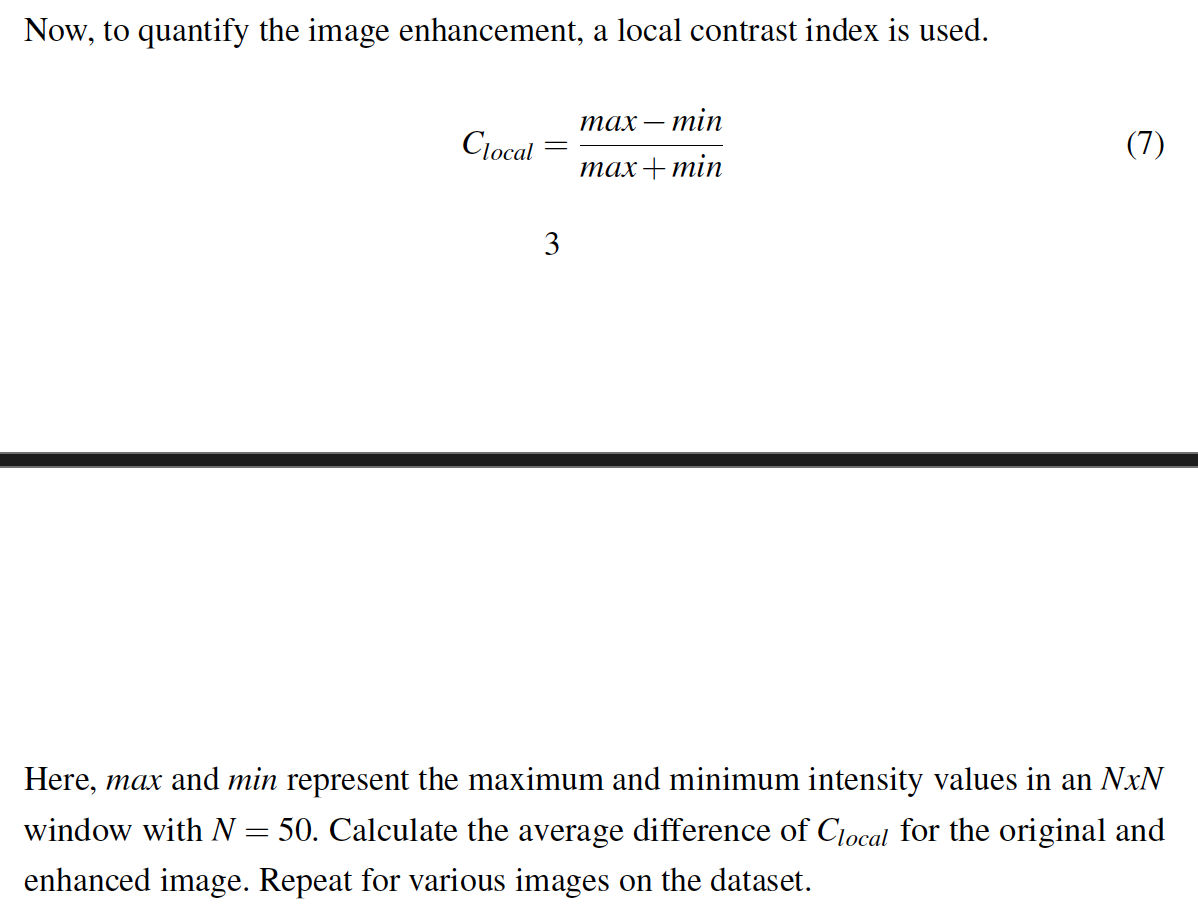

# Thank You !!